In [16]:
import pandas as pd
df = pd.read_csv('Speed Dating Data.csv', encoding='latin1')

In [17]:
from add_useful_column import add_useful_columns
df = add_useful_columns(df)

# 利用するカラムを選定

In [18]:
# データの基本情報確認
print("データの形状:", df.shape)
print("\n目的変数 'dec_o' の値の分布:")
# どう言う人が相手から会いたいとおもわれるのか
print(df['dec_o'].value_counts())
print(f"\n目的変数の欠損値数: {df['dec_o'].isnull().sum()}")

# Speed Dating データで重要そうな特徴量を選定
# 個人の基本情報と最初の印象評価を使用
feature_columns = [
    'age',           # 年齢
    'age_diff',     # 年齢差（相手の年齢 - 自分の年齢）
    # こう言う価値観を大事にしている人がモテる
    'attr1_1',       # 魅力の重視度
    'sinc1_1',       # 誠実さの重視度  
    'intel1_1',      # 知性の重視度
    'fun1_1',        # 楽しさの重視度
    'amb1_1',        # 野心の重視度
    'shar1_1',       # 共通の興味の重視度
    # 相手に対して、こう思った人がモテる
    'attr',          # 相手への魅力評価　
    'sinc',          # 相手への誠実さ評価
    'intel',         # 相手への知性評価
    'fun',           # 相手への楽しさ評価
    'amb',           # 相手への野心評価
    'shar',           # 相手との共通の興味評価
    'samerace', # 同じ人種かどうか（1: 同じ人種, 0: 異なる人種）
    # 人種ワンホット
    'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other',
    # 専攻ワンホット
    'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering',
    'field_english', 'field_history', 'field_business', 'field_education', 'field_science',
    'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts',
    'field_languages', 'field_architecture', 'field_other',
    # 将来の職業ワンホット
    'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine',
    'career_engineer', 'career_creative_arts_entertainment', 'career_business_related',
    'career_real_estate', 'career_international_humanitarian', 'career_undecided',
    'career_social_work', 'career_speech_pathology', 'career_politics',
    'career_pro_sports_athletics', 'career_other', 'career_journalism', 'career_architecture',
    # 会ったことがあるか
    'met', 'met_o',
    # 相手が自分にどう言う印象を持つ時、会いたいと思うか
    # 'attr_o',       # 魅力の重視度 相手の魅力とかいう雑な評価は当てにならない
    'sinc_o',       # 誠実さ
    'intel_o',      # 知性
    'fun_o',        # 楽しさ
    'amb_o',        # 野心
    'shar_o',       # 共通の興味
    'date', # デートに行く頻度
    # 趣味・余暇活動
    'sports',      # スポーツをすること/運動競技
    'tvsports',    # スポーツ観戦
    'exercise',    # エクササイズ/ボディビル
    'dining',      # 外食
    'museums',     # 美術館/博物館
    'art',         # アート鑑賞
    'hiking',      # ハイキング/キャンプ
    'gaming',      # ゲーム
    'clubbing',    # クラブ/ダンス
    'reading',     # 読書
    'tv',          # テレビ鑑賞
    'theater',     # 演劇鑑賞
    'movies',      # 映画鑑賞
    'concerts',    # コンサートに行くこと
    'music',       # 音楽鑑賞
    'shopping',    # ショッピング
    'yoga',        # ヨガ/瞑想
    # 自己評価
    'attr3_1',       # 魅力
    'sinc3_1',       # 誠実さ  
    'intel3_1',      # 知性
    'fun3_1',        # 楽しさ
    'amb3_1',        # 野心
]

print(f"\n選定した特徴量数: {len(feature_columns)}")
print("特徴量リスト:", feature_columns)

データの形状: (8378, 243)

目的変数 'dec_o' の値の分布:
dec_o
0    4863
1    3515
Name: count, dtype: int64

目的変数の欠損値数: 0

選定した特徴量数: 86
特徴量リスト: ['age', 'age_diff', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'samerace', 'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other', 'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering', 'field_english', 'field_history', 'field_business', 'field_education', 'field_science', 'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts', 'field_languages', 'field_architecture', 'field_other', 'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine', 'career_engineer', 'career_creative_arts_entertainment', 'career_business_related', 'career_real_estate', 'career_international_humanitarian', 'career_undecided', 'career_social_work', 'career_speech_pathology', 'ca

## 欠損値確認とデータ整形

In [19]:
# scikit-learnのライブラリをインポート
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 目的変数と特徴量の準備
# 目的変数(dec_o)に欠損値がある行を除外
df_clean = df.dropna(subset=['dec_o'])
print(f"欠損値除外後のデータ数: {len(df_clean)} (元: {len(df)})")

# 目的変数を準備
y = df_clean['dec_o'].astype(int)  # 0 or 1に変換
print(f"\n目的変数の分布:")
print(y.value_counts())
print(f"クラス比率 - No(0): {(y==0).mean():.3f}, Yes(1): {(y==1).mean():.3f}")

# 特徴量行列の準備
# 存在する特徴量のみを使用
available_features = [col for col in feature_columns if col in df_clean.columns]
print(f"利用可能な特徴量: {len(available_features)}")
print(f"利用可能な特徴量リスト: {available_features}")


欠損値除外後のデータ数: 8378 (元: 8378)

目的変数の分布:
dec_o
0    4863
1    3515
Name: count, dtype: int64
クラス比率 - No(0): 0.580, Yes(1): 0.420
利用可能な特徴量: 86
利用可能な特徴量リスト: ['age', 'age_diff', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'samerace', 'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other', 'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering', 'field_english', 'field_history', 'field_business', 'field_education', 'field_science', 'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts', 'field_languages', 'field_architecture', 'field_other', 'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine', 'career_engineer', 'career_creative_arts_entertainment', 'career_business_related', 'career_real_estate', 'career_international_humanitarian', 'career_undecided', 'career_social_work', 'career

## 利用するカラム抽出

In [20]:
# 特徴量行列X を作成
X = df_clean[available_features]
print(f"\n特徴量行列の形状: {X.shape}")

# 各特徴量の欠損値を最終確認
print(f"\n=== 最終的な欠損値状況 ===")
missing_summary = X.isnull().sum()
print(missing_summary[missing_summary > 0])

# scikit-learn 1.6.1は欠損値を自動処理するため、そのまま使用可能
print(f"\n欠損値のある行数: {X.isnull().any(axis=1).sum()}")


特徴量行列の形状: (8378, 86)

=== 最終的な欠損値状況 ===
age           95
age_diff     198
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
met          375
met_o        385
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
date          97
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       105
dtype: int64

欠損値のある行数: 2804


## 学習データと訓練データ

In [21]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1,      # 20%をテストデータに
    random_state=42,    # 再現性のため
    stratify=y          # クラス比率を保持
)

print("=== データ分割結果 ===")
print(f"訓練データ: {X_train.shape[0]} サンプル")
print(f"テストデータ: {X_test.shape[0]} サンプル")
print(f"特徴量数: {X_train.shape[1]}")

# 訓練データとテストデータのクラス分布を確認
print(f"\n訓練データのクラス分布:")
print(f"  No(0): {(y_train==0).sum()} ({(y_train==0).mean():.3f})")
print(f"  Yes(1): {(y_train==1).sum()} ({(y_train==1).mean():.3f})")

print(f"\nテストデータのクラス分布:")
print(f"  No(0): {(y_test==0).sum()} ({(y_test==0).mean():.3f})")
print(f"  Yes(1): {(y_test==1).sum()} ({(y_test==1).mean():.3f})")

=== データ分割結果 ===
訓練データ: 7540 サンプル
テストデータ: 838 サンプル
特徴量数: 86

訓練データのクラス分布:
  No(0): 4377 (0.581)
  Yes(1): 3163 (0.419)

テストデータのクラス分布:
  No(0): 486 (0.580)
  Yes(1): 352 (0.420)


# 決定木作成

In [22]:
# 決定木分類器を作成
clf = DecisionTreeClassifier(
    random_state=42,          # 再現性のため
    max_depth=10,             # 過学習を防ぐため深さを制限
    min_samples_split=20,     # 分割に必要な最小サンプル数
    min_samples_leaf=10,      # 葉ノードの最小サンプル数
    class_weight='balanced'   # クラス不均衡を考慮
)

print("=== 決定木モデルの訓練 ===")
print("モデルパラメータ:")
print(f"  最大深さ: {clf.max_depth}")
print(f"  分割最小サンプル数: {clf.min_samples_split}")
print(f"  葉ノード最小サンプル数: {clf.min_samples_leaf}")
print(f"  クラス重み: {clf.class_weight}")

# モデルを訓練
clf.fit(X_train, y_train)

=== 決定木モデルの訓練 ===
モデルパラメータ:
  最大深さ: 10
  分割最小サンプル数: 20
  葉ノード最小サンプル数: 10
  クラス重み: balanced


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

## 学習データ、テストデータを予測、過学習チェック

In [23]:
# モデルの予測と評価
print("=== モデルの評価 ===")

# 訓練データでの予測
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# テストデータでの予測
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"訓練データの精度: {train_accuracy:.4f}")
print(f"テストデータの精度: {test_accuracy:.4f}")

# 過学習チェック
if train_accuracy - test_accuracy > 0.1:
    print("⚠️  過学習の可能性があります")
else:
    print("✅ 過学習は見られません")

print(f"\n=== 詳細な分類レポート（テストデータ） ===")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Decision', 'Yes Decision']))

=== モデルの評価 ===
訓練データの精度: 0.7898
テストデータの精度: 0.6563
⚠️  過学習の可能性があります

=== 詳細な分類レポート（テストデータ） ===
              precision    recall  f1-score   support

 No Decision       0.73      0.65      0.69       486
Yes Decision       0.58      0.66      0.62       352

    accuracy                           0.66       838
   macro avg       0.65      0.66      0.65       838
weighted avg       0.67      0.66      0.66       838



# 男女別の決定分析

## 男女別のデータ用意

=== 男女別データの準備 ===
男性のデータ数: 4194
女性のデータ数: 4184

=== 男女別のdec_o（相手から会いたいと思われる）分布 ===
男性:
  No(0): 2665 (0.635)
  Yes(1): 1529 (0.365)
女性:
  No(0): 2198 (0.525)
  Yes(1): 1986 (0.475)


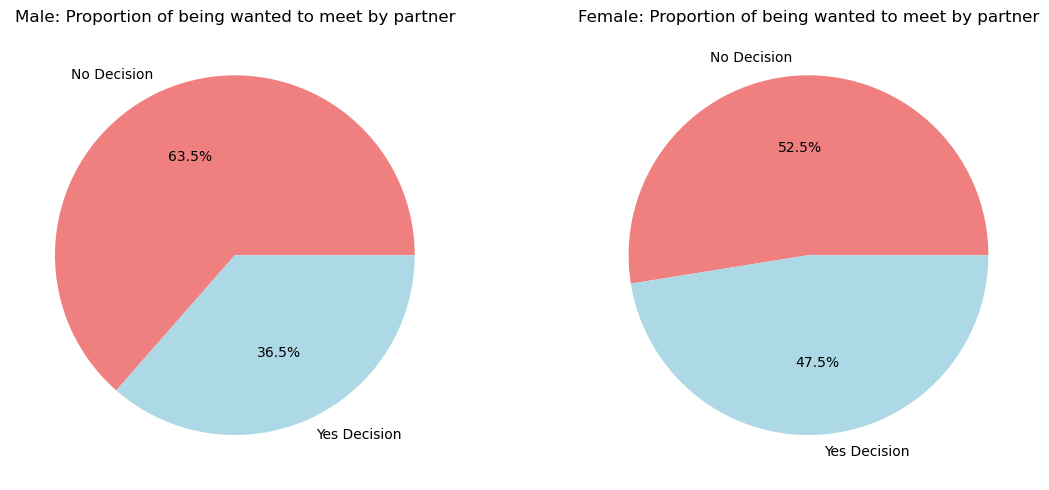

In [24]:
from matplotlib import pyplot as plt
# 男女別のデータ分割
print("=== 男女別データの準備 ===")

# 性別でデータを分割
df_male = df_clean[df_clean['gender'] == 1]   # 男性（1）
df_female = df_clean[df_clean['gender'] == 0] # 女性（0）

print(f"男性のデータ数: {len(df_male)}")
print(f"女性のデータ数: {len(df_female)}")

# 男女別の目的変数の分布を確認
print(f"\n=== 男女別のdec_o（相手から会いたいと思われる）分布 ===")

print("男性:")
male_dec_counts = df_male['dec_o'].value_counts()
print(f"  No(0): {male_dec_counts[0]} ({male_dec_counts[0]/len(df_male):.3f})")
print(f"  Yes(1): {male_dec_counts[1]} ({male_dec_counts[1]/len(df_male):.3f})")

print("女性:")
female_dec_counts = df_female['dec_o'].value_counts()
print(f"  No(0): {female_dec_counts[0]} ({female_dec_counts[0]/len(df_female):.3f})")
print(f"  Yes(1): {female_dec_counts[1]} ({female_dec_counts[1]/len(df_female):.3f})")

# 性別による成功率の違いを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 男性の分布
ax1.pie([male_dec_counts[0], male_dec_counts[1]], 
        labels=['No Decision', 'Yes Decision'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
ax1.set_title("Male: Proportion of being wanted to meet by partner")

# 女性の分布
ax2.pie([female_dec_counts[0], female_dec_counts[1]], 
        labels=['No Decision', 'Yes Decision'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
ax2.set_title('Female: Proportion of being wanted to meet by partner')

plt.tight_layout()
plt.show()

## 男の決定木作成

In [25]:
# 男性用の決定木モデル構築
print("\n" + "="*50)
print("=== 男性用決定木モデルの構築 ===")

# 男性データの特徴量と目的変数を準備
X_male = df_male[available_features]
y_male = df_male['dec_o'].astype(int)

print(f"男性データの特徴量行列形状: {X_male.shape}")
print(f"男性データの目的変数分布: No={sum(y_male==0)}, Yes={sum(y_male==1)}")

# 男性データを訓練用とテスト用に分割
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, 
    test_size=0.2,
    random_state=42,
    stratify=y_male
)

print(f"男性訓練データ: {X_train_male.shape[0]} サンプル")
print(f"男性テストデータ: {X_test_male.shape[0]} サンプル")

# 男性用決定木分類器を作成・訓練
clf_male = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)

clf_male.fit(X_train_male, y_train_male)

# 男性モデルの評価
y_train_pred_male = clf_male.predict(X_train_male)
y_test_pred_male = clf_male.predict(X_test_male)

train_accuracy_male = accuracy_score(y_train_male, y_train_pred_male)
test_accuracy_male = accuracy_score(y_test_male, y_test_pred_male)

print(f"\n男性モデルの性能:")
print(f"  訓練データ精度: {train_accuracy_male:.4f}")
print(f"  テストデータ精度: {test_accuracy_male:.4f}")

# 男性の特徴量重要度
feature_importance_male = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf_male.feature_importances_
}).sort_values('重要度', ascending=False)

print(f"\n男性で最も重要な特徴量（上位5個）:")
for i, (_, row) in enumerate(feature_importance_male.head(5).iterrows(), 1):
    print(f"  {i}. {row['特徴量']:15s}: {row['重要度']:.4f}")


=== 男性用決定木モデルの構築 ===
男性データの特徴量行列形状: (4194, 86)
男性データの目的変数分布: No=2665, Yes=1529
男性訓練データ: 3355 サンプル
男性テストデータ: 839 サンプル

男性モデルの性能:
  訓練データ精度: 0.8012
  テストデータ精度: 0.6615

男性で最も重要な特徴量（上位5個）:
  1. fun_o          : 0.3652
  2. shar_o         : 0.1275
  3. attr           : 0.0323
  4. attr1_1        : 0.0298
  5. age_diff       : 0.0281


## 女の決定木作成

In [26]:
# 女性用の決定木モデル構築
print("\n" + "="*50)
print("=== 女性用決定木モデルの構築 ===")

# 女性データの特徴量と目的変数を準備
X_female = df_female[available_features]
y_female = df_female['dec_o'].astype(int)

print(f"女性データの特徴量行列形状: {X_female.shape}")
print(f"女性データの目的変数分布: No={sum(y_female==0)}, Yes={sum(y_female==1)}")

# 女性データを訓練用とテスト用に分割
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, 
    test_size=0.2,
    random_state=42,
    stratify=y_female
)

print(f"女性訓練データ: {X_train_female.shape[0]} サンプル")
print(f"女性テストデータ: {X_test_female.shape[0]} サンプル")

# 女性用決定木分類器を作成・訓練
clf_female = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)

clf_female.fit(X_train_female, y_train_female)

# 女性モデルの評価
y_train_pred_female = clf_female.predict(X_train_female)
y_test_pred_female = clf_female.predict(X_test_female)

train_accuracy_female = accuracy_score(y_train_female, y_train_pred_female)
test_accuracy_female = accuracy_score(y_test_female, y_test_pred_female)

print(f"\n女性モデルの性能:")
print(f"  訓練データ精度: {train_accuracy_female:.4f}")
print(f"  テストデータ精度: {test_accuracy_female:.4f}")

# 女性の特徴量重要度
feature_importance_female = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf_female.feature_importances_
}).sort_values('重要度', ascending=False)

print(f"\n女性で最も重要な特徴量（上位5個）:")
for i, (_, row) in enumerate(feature_importance_female.head(5).iterrows(), 1):
    print(f"  {i}. {row['特徴量']:15s}: {row['重要度']:.4f}")


=== 女性用決定木モデルの構築 ===
女性データの特徴量行列形状: (4184, 86)
女性データの目的変数分布: No=2198, Yes=1986
女性訓練データ: 3347 サンプル
女性テストデータ: 837 サンプル

女性モデルの性能:
  訓練データ精度: 0.7935
  テストデータ精度: 0.6679

女性で最も重要な特徴量（上位5個）:
  1. fun_o          : 0.3362
  2. shar_o         : 0.1404
  3. age_diff       : 0.0296
  4. intel_o        : 0.0283
  5. sports         : 0.0248


## 男女比較


=== 男女別特徴量重要度の比較 ===
男女で重要度が大きく異なる特徴量:
  fun_o          : 男性=0.3652, 女性=0.3362, 差=+0.0290
  attr           : 男性=0.0323, 女性=0.0090, 差=+0.0233
  sinc1_1        : 男性=0.0208, 女性=0.0002, 差=+0.0206
  fun            : 男性=0.0208, 女性=0.0048, 差=+0.0161
  fun1_1         : 男性=0.0205, 女性=0.0094, 差=+0.0111

女性で特に重要度が高い特徴量:
  intel1_1       : 男性=0.0061, 女性=0.0239, 差=-0.0178
  sports         : 男性=0.0080, 女性=0.0248, 差=-0.0167
  intel_o        : 男性=0.0119, 女性=0.0283, 差=-0.0164
  shar_o         : 男性=0.1275, 女性=0.1404, 差=-0.0129
  museums        : 男性=0.0020, 女性=0.0148, 差=-0.0127


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/1903182330.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=male_top, y='特徴量', x='重要度', palette='Blues', ax=axes[0,0])
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/1903182330.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=female_top, y='特徴量', x='重要度', palette='Reds', ax=axes[0,1])


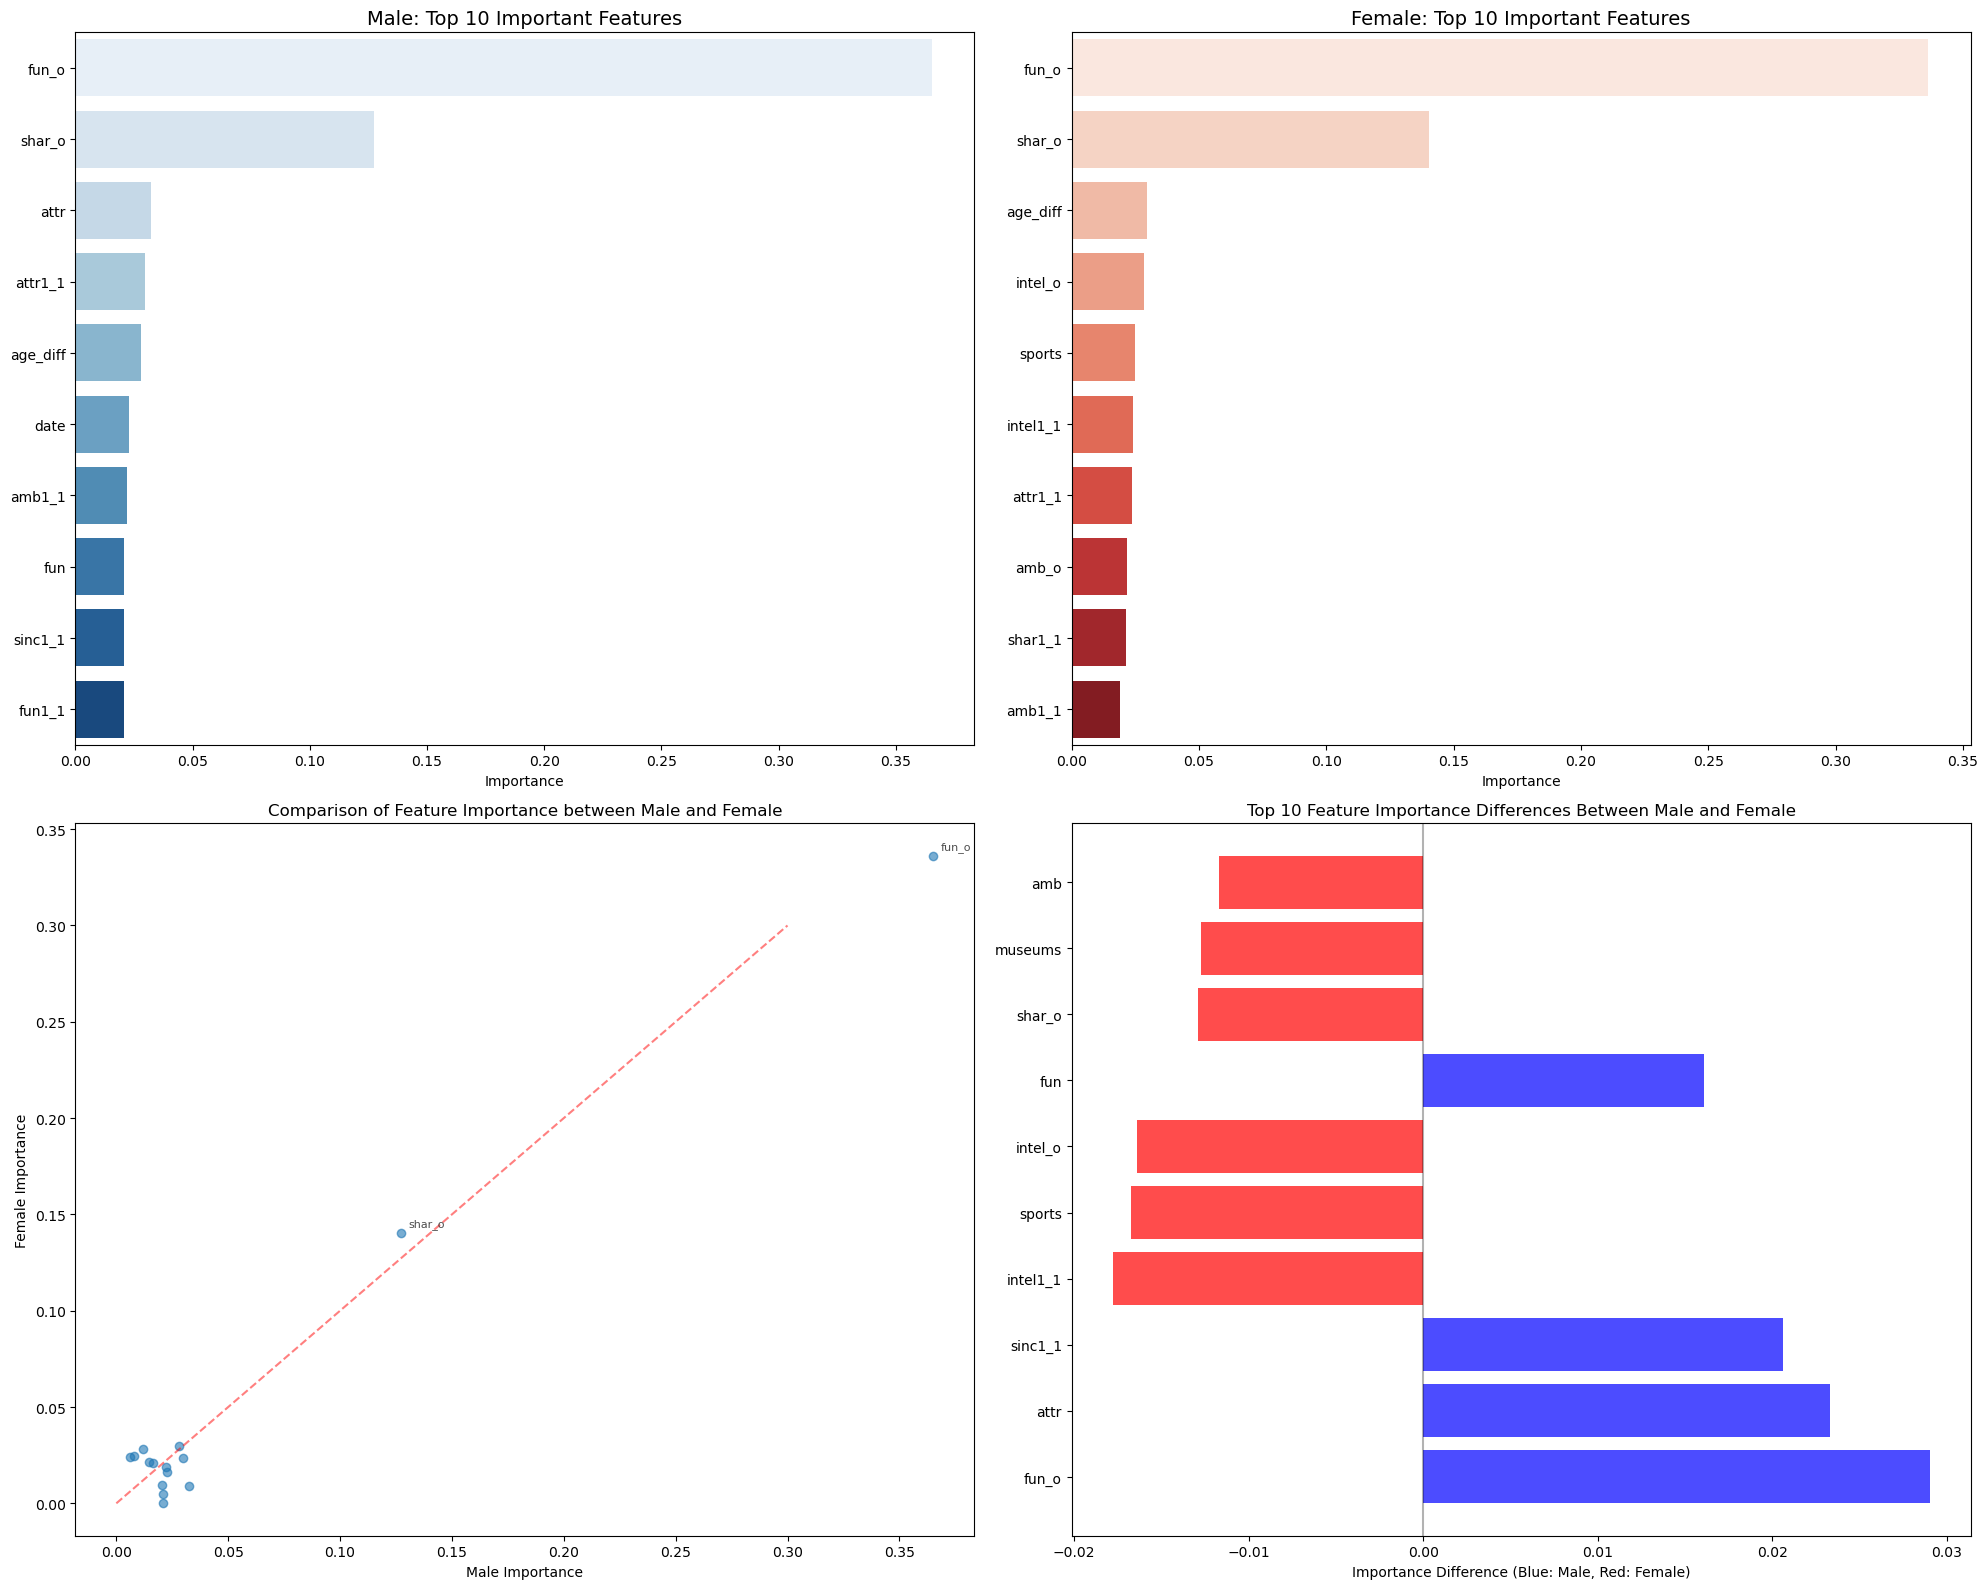

In [27]:
import seaborn as sns
# 男女別の特徴量重要度比較
print("\n" + "="*50)
print("=== 男女別特徴量重要度の比較 ===")

# 上位10個の特徴量を比較
top_n = 10
male_top = feature_importance_male.head(top_n)
female_top = feature_importance_female.head(top_n)

# 比較用データフレームを作成
comparison_df = pd.DataFrame({
    '特徴量': available_features,
    '男性_重要度': clf_male.feature_importances_,
    '女性_重要度': clf_female.feature_importances_
})

# 重要度の差を計算
comparison_df['重要度差(男性-女性)'] = comparison_df['男性_重要度'] - comparison_df['女性_重要度']
comparison_df = comparison_df.sort_values('男性_重要度', ascending=False)

print("男女で重要度が大きく異なる特徴量:")
diff_features = comparison_df.nlargest(5, '重要度差(男性-女性)')
for _, row in diff_features.iterrows():
    print(f"  {row['特徴量']:15s}: 男性={row['男性_重要度']:.4f}, 女性={row['女性_重要度']:.4f}, 差={row['重要度差(男性-女性)']:+.4f}")

print("\n女性で特に重要度が高い特徴量:")
female_dominant = comparison_df.nsmallest(5, '重要度差(男性-女性)')
for _, row in female_dominant.iterrows():
    print(f"  {row['特徴量']:15s}: 男性={row['男性_重要度']:.4f}, 女性={row['女性_重要度']:.4f}, 差={row['重要度差(男性-女性)']:+.4f}")

# 特徴量重要度の比較可視化
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. 男性の特徴量重要度
sns.barplot(data=male_top, y='特徴量', x='重要度', palette='Blues', ax=axes[0,0])
axes[0,0].set_title('Male: Top 10 Important Features', fontsize=14)
axes[0,0].set_xlabel('Importance')
axes[0,0].set_ylabel('')

# 2. 女性の特徴量重要度
sns.barplot(data=female_top, y='特徴量', x='重要度', palette='Reds', ax=axes[0,1])
axes[0,1].set_title('Female: Top 10 Important Features', fontsize=14)
axes[0,1].set_xlabel('Importance')
axes[0,1].set_ylabel('')

# 3. 男女の重要度比較（散布図）
top_features_both = list(set(male_top['特徴量'].tolist() + female_top['特徴量'].tolist()))
comparison_top = comparison_df[comparison_df['特徴量'].isin(top_features_both)]

axes[1,0].scatter(comparison_top['男性_重要度'], comparison_top['女性_重要度'], alpha=0.6)
axes[1,0].plot([0, 0.3], [0, 0.3], 'r--', alpha=0.5)  # 対角線
axes[1,0].set_xlabel('Male Importance')
axes[1,0].set_ylabel('Female Importance')
axes[1,0].set_title('Comparison of Feature Importance between Male and Female')

# 重要な特徴量にラベルを追加
for _, row in comparison_top.iterrows():
    if row['男性_重要度'] > 0.05 or row['女性_重要度'] > 0.05:
        axes[1,0].annotate(row['特徴量'], 
                          (row['男性_重要度'], row['女性_重要度']),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=8, alpha=0.7)

# 4. 重要度差のバープロット
top_diff = comparison_df.loc[comparison_df['重要度差(男性-女性)'].abs().nlargest(10).index].reset_index(drop=True)
colors = ['blue' if x > 0 else 'red' for x in top_diff['重要度差(男性-女性)']]
axes[1,1].barh(top_diff.index, top_diff['重要度差(男性-女性)'], color=colors, alpha=0.7)
axes[1,1].set_yticks(top_diff.index)
axes[1,1].set_yticklabels(top_diff['特徴量'].astype(str).values)
axes[1,1].set_xlabel('Importance Difference (Blue: Male, Red: Female)')
axes[1,1].set_title('Top 10 Feature Importance Differences Between Male and Female')
axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


=== 男女別決定木の構造比較 ===


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:32: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:32: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:32: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:32: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:32: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdk

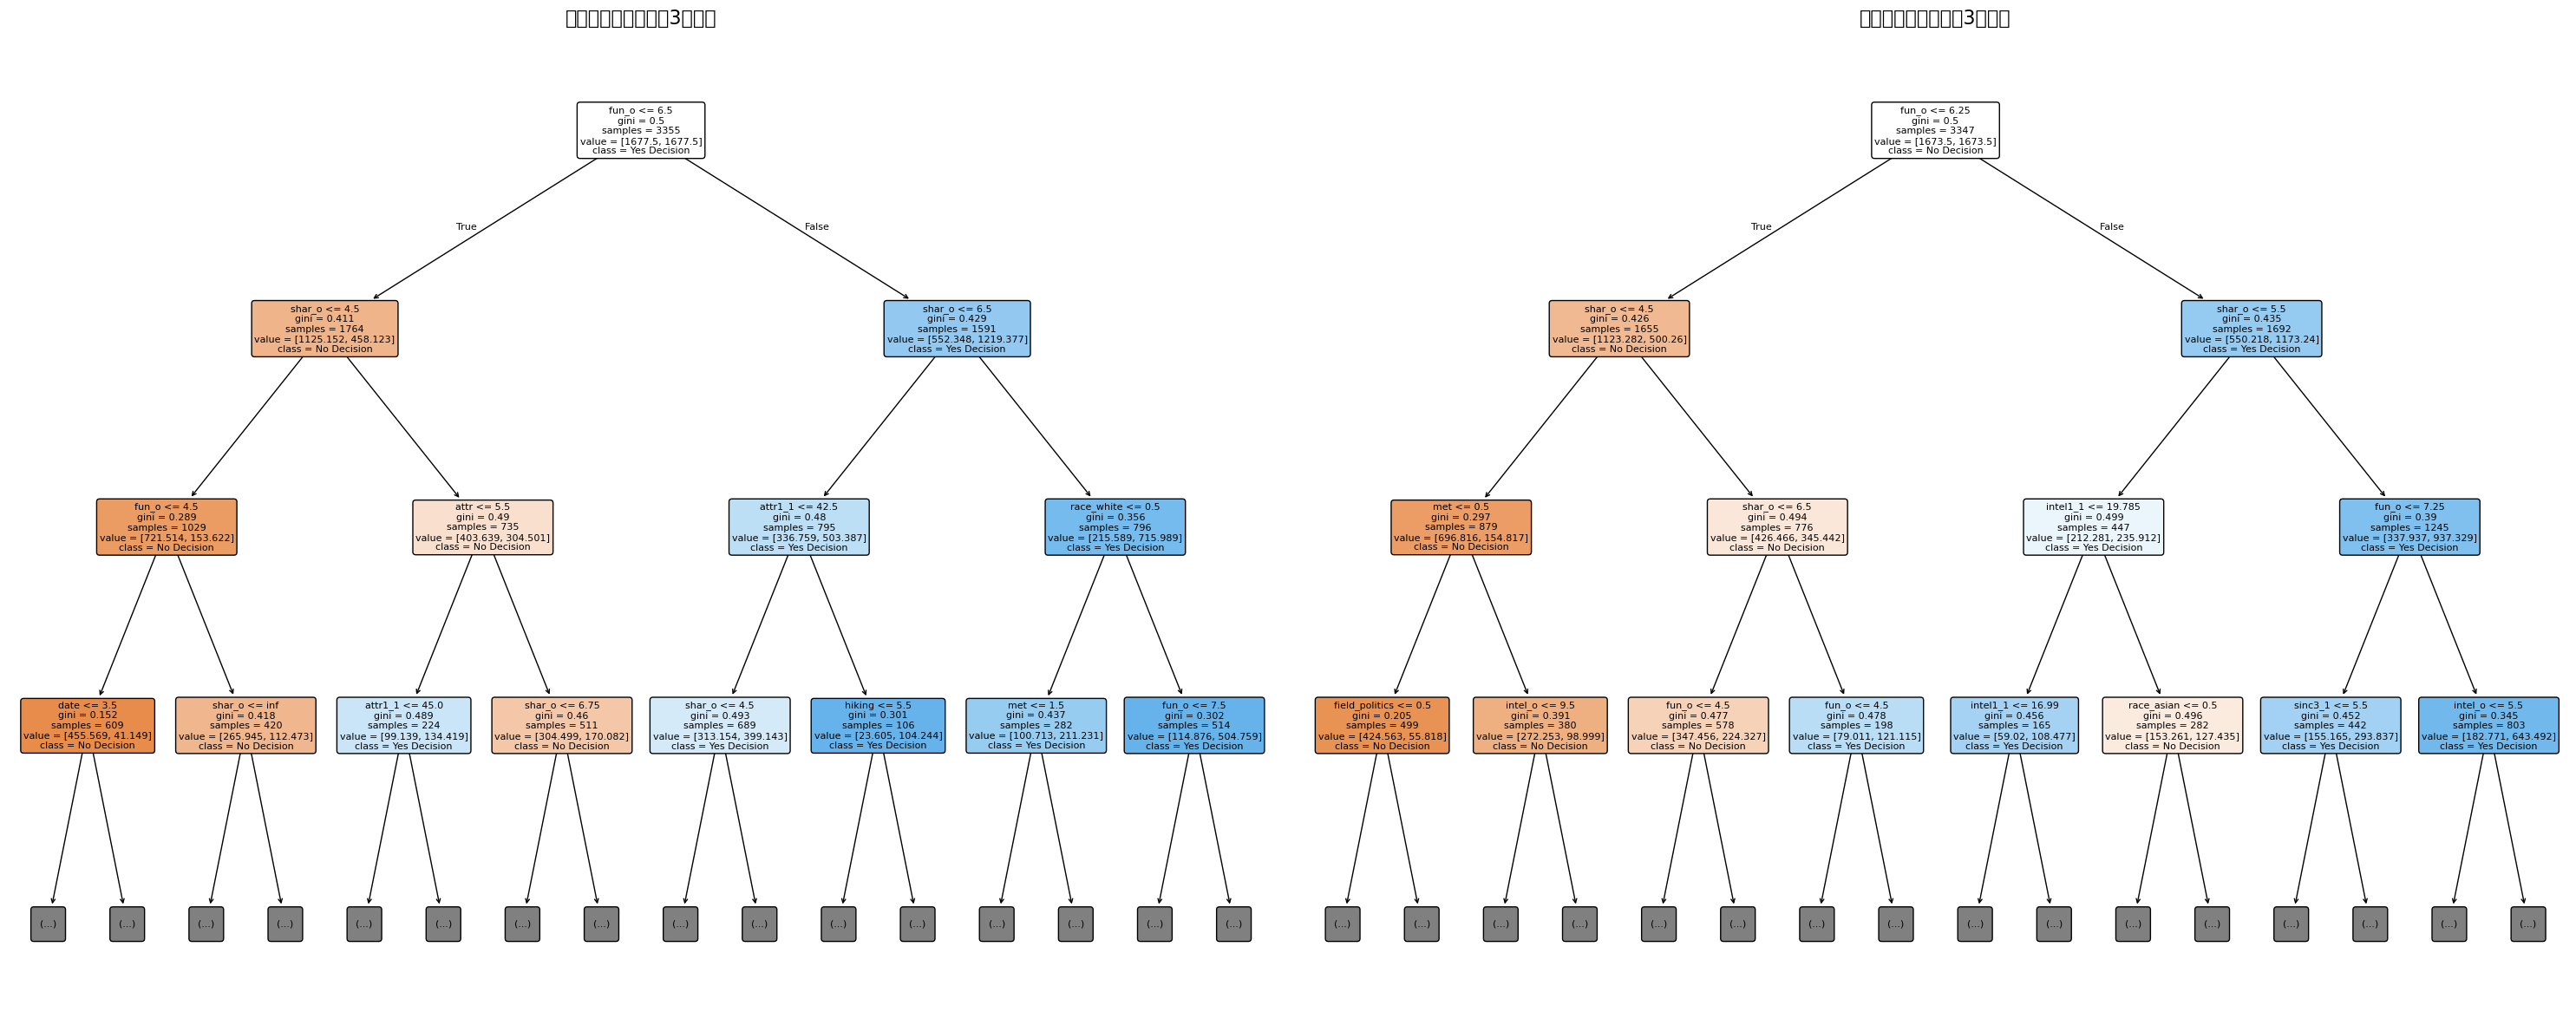


=== 男女別モデル性能の比較 ===
  モデル      訓練精度     テスト精度  データ数
0  全体  0.789788  0.656325  8378
1  男性  0.801192  0.661502  4194
2  女性  0.793546  0.667861  4184


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:75: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:75: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:75: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:75: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/198919269.py:75: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8j

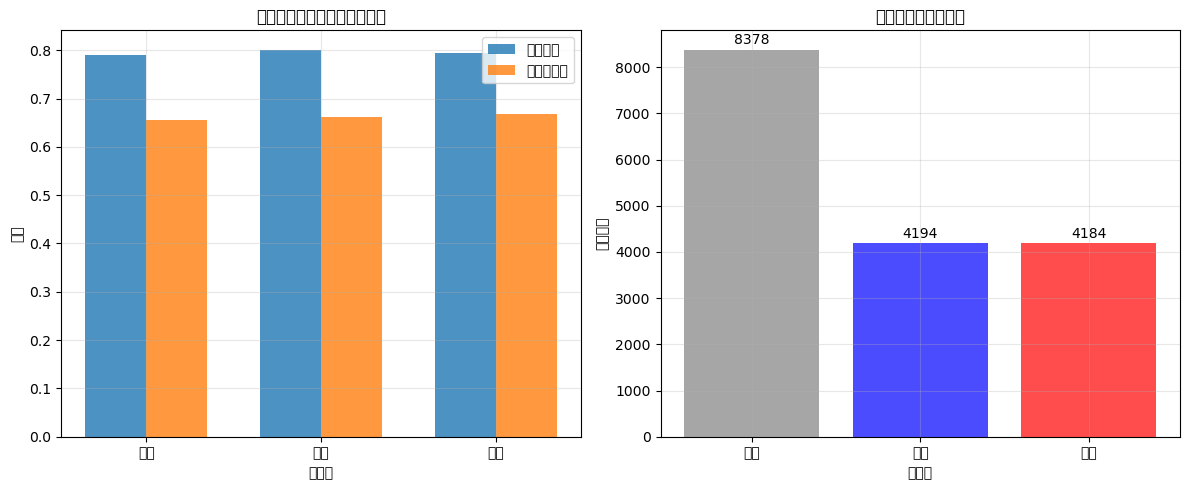

In [46]:
from sklearn.tree import plot_tree

# 男女別決定木の可視化
print("\n" + "="*50)
print("=== 男女別決定木の構造比較 ===")

# 男女の決定木を並べて表示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# 男性の決定木
plot_tree(clf_male, 
          max_depth=3,
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=8,
          ax=ax1)
ax1.set_title('男性の決定木（深さ3まで）', fontsize=16)

# 女性の決定木
plot_tree(clf_female, 
          max_depth=3,
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=8,
          ax=ax2)
ax2.set_title('女性の決定木（深さ3まで）', fontsize=16)

plt.tight_layout()
plt.show()

# 性能比較の可視化
print("\n=== 男女別モデル性能の比較 ===")

performance_data = {
    'モデル': ['全体', '男性', '女性'],
    '訓練精度': [train_accuracy, train_accuracy_male, train_accuracy_female],
    'テスト精度': [test_accuracy, test_accuracy_male, test_accuracy_female],
    'データ数': [len(X), len(X_male), len(X_female)]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

# 性能比較のバープロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 精度比較
x = range(len(performance_df))
width = 0.35
ax1.bar([i - width/2 for i in x], performance_df['訓練精度'], width, label='訓練精度', alpha=0.8)
ax1.bar([i + width/2 for i in x], performance_df['テスト精度'], width, label='テスト精度', alpha=0.8)
ax1.set_xlabel('モデル')
ax1.set_ylabel('精度')
ax1.set_title('男女別モデルの予測精度比較')
ax1.set_xticks(x)
ax1.set_xticklabels(performance_df['モデル'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# データ数比較
ax2.bar(performance_df['モデル'], performance_df['データ数'], color=['gray', 'blue', 'red'], alpha=0.7)
ax2.set_xlabel('モデル')
ax2.set_ylabel('データ数')
ax2.set_title('各モデルのデータ数')
ax2.grid(True, alpha=0.3)

# 数値をバーの上に表示
for i, v in enumerate(performance_df['データ数']):
    ax2.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
# 特徴量と目的変数の関係性分析
def analyze_feature_relationships(X, y, feature_names, top_n=10):
    """
    特徴量と目的変数の関係性を分析
    - 相関係数による関係性の確認
    - 各特徴量の値域別の成功率分析
    """
    print("=== 特徴量と目的変数の関係性分析 ===")
    
    # 1. 相関係数による分析
    correlation_data = []
    for feature in feature_names[:top_n]:
        if feature in X.columns:
            # 欠損値を除外して相関を計算
            valid_mask = ~(X[feature].isna() | y.isna())
            if valid_mask.sum() > 0:
                corr = X.loc[valid_mask, feature].corr(y.loc[valid_mask])
                correlation_data.append({
                    'feature': feature,
                    'correlation': corr,
                    'direction': 'Positive' if corr > 0 else 'Negative',
                    'strength': abs(corr)
                })
    
    corr_df = pd.DataFrame(correlation_data).sort_values('strength', ascending=False)
    
    print(f"\n上位{top_n}特徴量の相関係数:")
    for _, row in corr_df.head(top_n).iterrows():
        direction_emoji = "📈" if row['direction'] == 'Positive' else "📉"
        print(f"  {row['feature']:20s}: {row['correlation']:+.4f} {direction_emoji} {row['direction']}")
    
    # 2. 値域別成功率分析
    print(f"\n=== 値域別成功率分析 ===")
    for feature in feature_names[:5]:  # 上位5個の特徴量について
        if feature in X.columns:
            analyze_feature_bins(X[feature], y, feature)
    
    return corr_df

def analyze_feature_bins(feature_series, target, feature_name, n_bins=4):
    """特徴量を区間に分けて成功率を分析"""
    valid_mask = ~(feature_series.isna() | target.isna())
    if valid_mask.sum() == 0:
        return
    
    valid_feature = feature_series[valid_mask]
    valid_target = target[valid_mask]
    
    # 値が全て同じ場合をチェック
    if valid_feature.nunique() <= 1:
        print(f"\n{feature_name}: 値に変動がありません")
        return
    
    try:
        # パーセンタイルベースでビンを作成
        bins = pd.qcut(valid_feature, q=n_bins, duplicates='drop')
        bin_analysis = pd.DataFrame({
            'bin': bins,
            'target': valid_target
        })
        
        result = bin_analysis.groupby('bin').agg({
            'target': ['count', 'mean', 'sum']
        }).round(3)
        
        result.columns = ['Sample_Count', 'Success_Rate', 'Success_Count']
        
        print(f"\n{feature_name} の値域別成功率:")
        for idx, row in result.iterrows():
            range_str = f"[{idx.left:.2f}, {idx.right:.2f}]"
            print(f"  {range_str:20s}: 成功率 {row['Success_Rate']:.3f} ({row['Success_Count']:.0f}/{row['Sample_Count']:.0f})")
            
    except Exception as e:
        print(f"\n{feature_name}: 分析エラー - {str(e)}")

# 男性の特徴量関係性分析
print("="*60)
print("=== 男性の特徴量関係性分析 ===")
male_top_features = feature_importance_male.head(10)['特徴量'].tolist()
male_corr = analyze_feature_relationships(X_male, y_male, male_top_features, 10)

=== 男性の特徴量関係性分析 ===
=== 特徴量と目的変数の関係性分析 ===

上位10特徴量の相関係数:
  fun_o               : +0.4166 📈 Positive
  shar_o              : +0.4132 📈 Positive
  sinc1_1             : -0.1301 📉 Negative
  attr1_1             : +0.1245 📈 Positive
  date                : -0.1219 📉 Negative
  fun                 : +0.0568 📈 Positive
  attr                : -0.0528 📉 Negative
  age_diff            : +0.0388 📈 Positive
  fun1_1              : +0.0365 📈 Positive
  amb1_1              : -0.0353 📉 Negative

=== 値域別成功率分析 ===

fun_o の値域別成功率:
  [-0.00, 5.00]       : 成功率 0.135 (172/1276)
  [5.00, 6.00]        : 成功率 0.309 (230/745)
  [6.00, 8.00]        : 成功率 0.510 (761/1492)
  [8.00, 10.00]       : 成功率 0.709 (346/488)

shar_o の値域別成功率:
  [-0.00, 4.00]       : 成功率 0.132 (147/1117)
  [4.00, 6.00]        : 成功率 0.361 (463/1282)
  [6.00, 7.00]        : 成功率 0.550 (317/576)
  [7.00, 10.00]       : 成功率 0.682 (432/633)

attr の値域別成功率:
  [-0.00, 5.00]       : 成功率 0.420 (488/1163)
  [5.00, 7.00]        : 成功率 0.339 (586/1731)


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = bin_analysis.groupby('bin').agg({
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = bin_analysis.groupby('bin').agg({
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

In [41]:
# 女性の特徴量関係性分析
print("\n" + "="*60)
print("=== 女性の特徴量関係性分析 ===")
female_top_features = feature_importance_female.head(30)['特徴量'].tolist()
female_corr = analyze_feature_relationships(X_female, y_female, female_top_features, 30)


=== 女性の特徴量関係性分析 ===
=== 特徴量と目的変数の関係性分析 ===

上位30特徴量の相関係数:
  fun_o               : +0.4069 📈 Positive
  shar_o              : +0.3870 📈 Positive
  amb_o               : +0.2187 📈 Positive
  intel_o             : +0.2155 📈 Positive
  sinc_o              : +0.1904 📈 Positive
  shar1_1             : -0.0993 📉 Negative
  exercise            : +0.0865 📈 Positive
  race_asian          : -0.0774 📉 Negative
  intel               : +0.0725 📈 Positive
  sports              : +0.0615 📈 Positive
  fun1_1              : +0.0615 📈 Positive
  tv                  : -0.0553 📉 Negative
  met                 : +0.0522 📈 Positive
  amb                 : +0.0497 📈 Positive
  tvsports            : -0.0485 📉 Negative
  hiking              : +0.0422 📈 Positive
  movies              : -0.0401 📉 Negative
  amb3_1              : -0.0389 📉 Negative
  attr                : -0.0366 📉 Negative
  date                : -0.0355 📉 Negative
  clubbing            : +0.0332 📈 Positive
  concerts            : -0.0317 📉 Nega

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = bin_analysis.groupby('bin').agg({
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = bin_analysis.groupby('bin').agg({
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_2603/2061468292.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

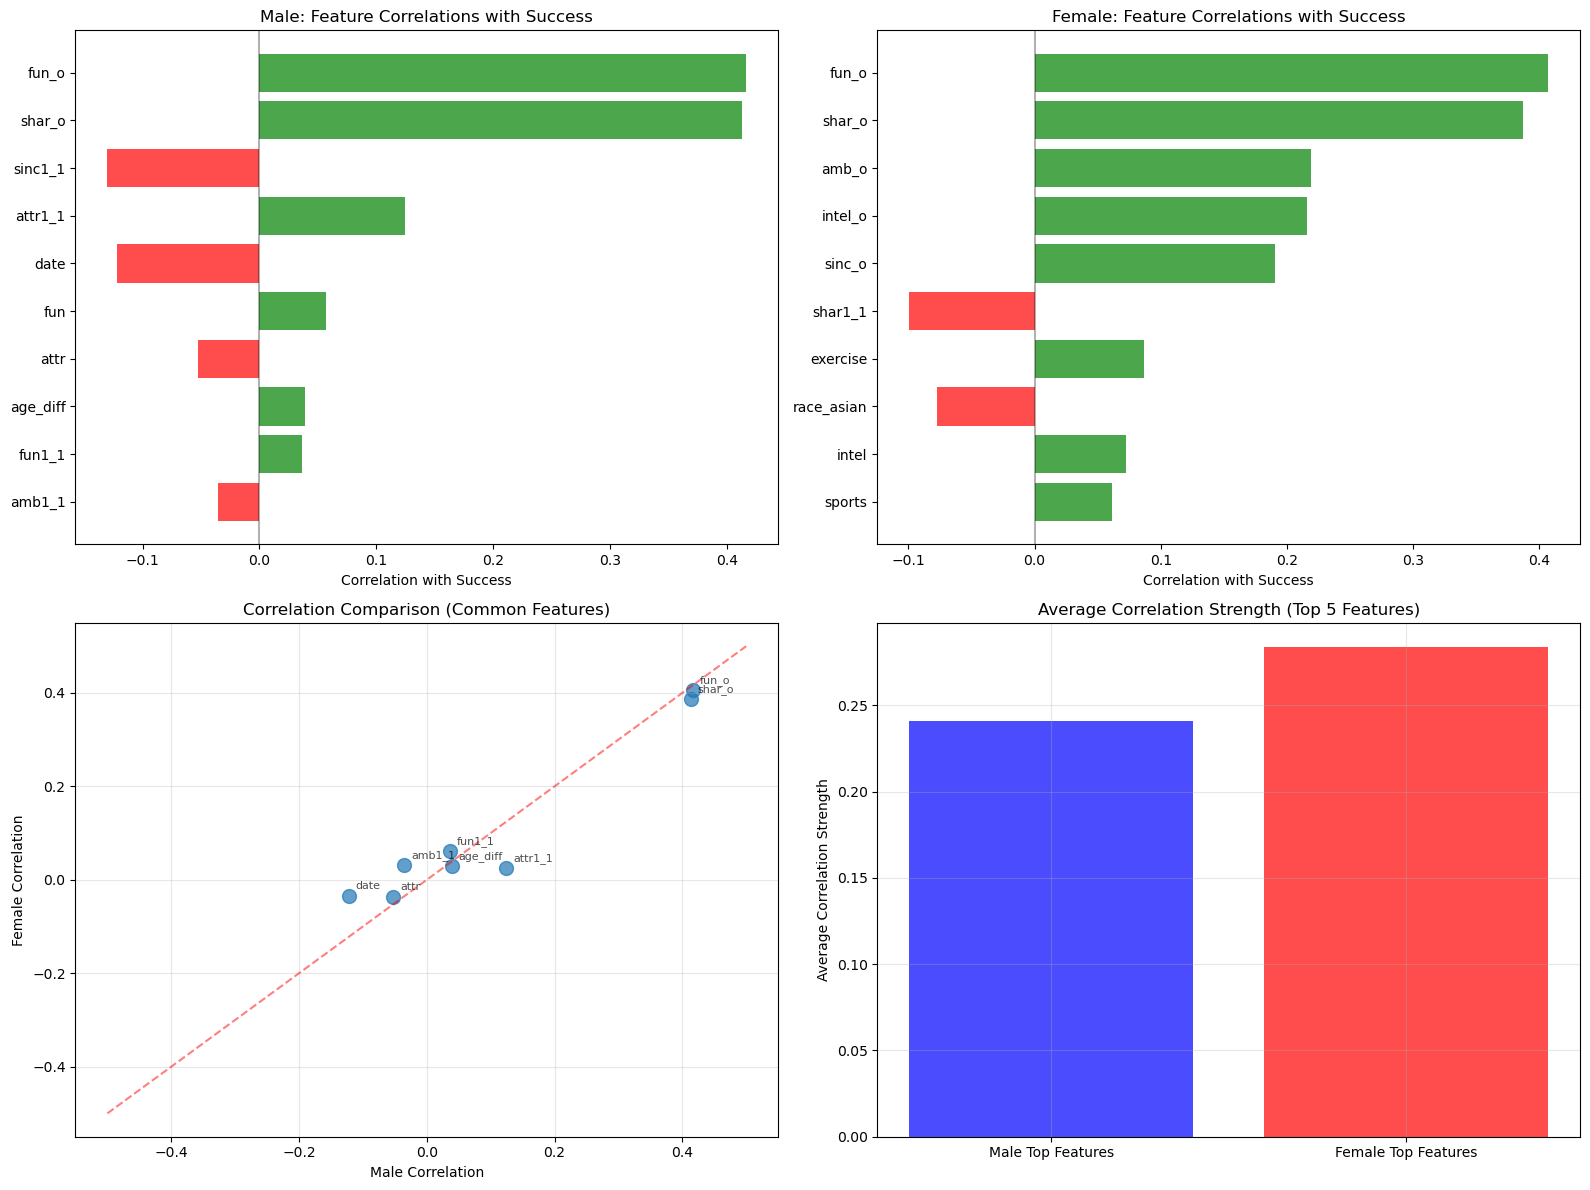

In [43]:
# 相関係数の可視化
def plot_correlation_comparison(male_corr, female_corr):
    """男女別の相関係数を比較可視化"""
    
    # 共通の特徴量を抽出
    common_features = set(male_corr['feature']) & set(female_corr['feature'])
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 男性の相関係数
    male_top = male_corr.head(10)
    colors_male = ['green' if x > 0 else 'red' for x in male_top['correlation']]
    axes[0,0].barh(range(len(male_top)), male_top['correlation'], color=colors_male, alpha=0.7)
    axes[0,0].set_yticks(range(len(male_top)))
    axes[0,0].set_yticklabels(male_top['feature'])
    axes[0,0].set_xlabel('Correlation with Success')
    axes[0,0].set_title('Male: Feature Correlations with Success')
    axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[0,0].invert_yaxis()
    
    # 2. 女性の相関係数
    female_top = female_corr.head(10)
    colors_female = ['green' if x > 0 else 'red' for x in female_top['correlation']]
    axes[0,1].barh(range(len(female_top)), female_top['correlation'], color=colors_female, alpha=0.7)
    axes[0,1].set_yticks(range(len(female_top)))
    axes[0,1].set_yticklabels(female_top['feature'])
    axes[0,1].set_xlabel('Correlation with Success')
    axes[0,1].set_title('Female: Feature Correlations with Success')
    axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[0,1].invert_yaxis()
    
    # 3. 共通特徴量の相関比較（散布図）
    if common_features:
        male_common = male_corr[male_corr['feature'].isin(common_features)]
        female_common = female_corr[female_corr['feature'].isin(common_features)]
        
        # データをマージ
        comparison = pd.merge(
            male_common[['feature', 'correlation']].rename(columns={'correlation': 'male_corr'}),
            female_common[['feature', 'correlation']].rename(columns={'correlation': 'female_corr'}),
            on='feature'
        )
        
        axes[1,0].scatter(comparison['male_corr'], comparison['female_corr'], alpha=0.7, s=100)
        axes[1,0].plot([-0.5, 0.5], [-0.5, 0.5], 'r--', alpha=0.5)
        axes[1,0].set_xlabel('Male Correlation')
        axes[1,0].set_ylabel('Female Correlation')
        axes[1,0].set_title('Correlation Comparison (Common Features)')
        axes[1,0].grid(True, alpha=0.3)
        
        # 特徴量名をラベルとして追加
        for _, row in comparison.iterrows():
            axes[1,0].annotate(row['feature'], 
                              (row['male_corr'], row['female_corr']),
                              xytext=(5, 5), textcoords='offset points',
                              fontsize=8, alpha=0.7)
    
    # 4. 相関の強さ比較
    axes[1,1].bar(['Male Top Features', 'Female Top Features'], 
                  [male_corr.head(5)['strength'].mean(), female_corr.head(5)['strength'].mean()],
                  color=['blue', 'red'], alpha=0.7)
    axes[1,1].set_ylabel('Average Correlation Strength')
    axes[1,1].set_title('Average Correlation Strength (Top 5 Features)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 相関比較の可視化を実行
plot_correlation_comparison(male_corr, female_corr)